In [19]:
def auth(auth):
    "Save authentication credentials to a JSON file"
    api_key = "1"
    api_secret_key = "2"
    access_token = "3"
    access_token_secret = "4"
    open(auth, "w").write(
        json.dumps(
            {
                "api_key": api_key,
                "api_secret_key": api_secret_key,
                "access_token": access_token,
                "access_token_secret": access_token_secret,
            },
        )
    )

In [20]:
auth("auth.json")

In [16]:
ls

'auth and get friends.ipynb'  'hud queries.ipynb'   __pycache__/
 auth.json                     __init__.py         'save profile.ipynb'
 db.ipynb                      old_db.py            Untitled.ipynb
 db.py                         old_utils.py
 dbsw.py                       plan.md


## Retrieving tweets by specific accounts

`twitter-to-sqlite user-timeline twitter.db`

In [21]:
import datetime
import hashlib
import json
import os
import pathlib
import time

import click

from twitter_to_sqlite import archive
from twitter_to_sqlite import utils

In [23]:
from twitter_to_sqlite import cli

In [ ]:
auth = json.load(open(auth))
session = utils.session_for_auth(auth)
db = utils.open_database(db_path)
identifiers = utils.resolve_identifiers(db, identifiers, attach, sql)

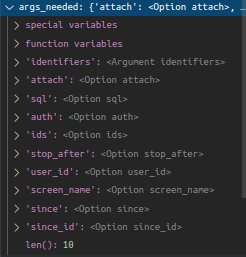

In [43]:
db_path="twitter.db"
auth="../auth/auth.json"

In [47]:
call_click_command(cli.user_timeline, [db_path, auth])

BadParameter: Missing required positionalparameter 'identifiers'

In [50]:
db

<Database <sqlite3.Connection object at 0x7fbbce998e40>>

In [ ]:
auth = json.load(open(auth))
session = utils.session_for_auth(auth)
db = utils.open_database(db_path)

In [51]:
identifiers = utils.resolve_identifiers(db, identifiers, attach, sql)

TypeError: resolve_identifiers() missing 3 required positional arguments: 'identifiers', 'attach', and 'sql'

In [36]:
def call_click_command(cmd, *args, **kwargs):
    """Wrapper to call a click command

    :param cmd: click cli command function to call
    :param args: arguments to pass to the function
    :param kwargs: keywrod arguments to pass to the function
    :return: None
    """

    # Get positional arguments from args
    arg_values = {c.name: a for a, c in zip(args, cmd.params)}
    args_needed = {c.name: c for c in cmd.params if c.name not in arg_values}

    # build and check opts list from kwargs
    opts = {a.name: a for a in cmd.params if isinstance(a, click.Option)}
    for name in kwargs:
        if name in opts:
            arg_values[name] = kwargs[name]
        else:
            if name in args_needed:
                arg_values[name] = kwargs[name]
                del args_needed[name]
            else:
                raise click.BadParameter("Unknown keyword argument '{}'".format(name))

    # check positional arguments list
    for arg in (a for a in cmd.params if isinstance(a, click.Argument)):
        if arg.name not in arg_values:
            raise click.BadParameter(
                "Missing required positional" "parameter '{}'".format(arg.name)
            )

    # build parameter lists
    opts_list = sum([[o.opts[0], str(arg_values[n])] for n, o in opts.items()], [])
    args_list = [str(v) for n, v in arg_values.items() if n not in opts]

    # call the command
    cmd(opts_list + args_list)